## Waste Management using CNN Model

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("techsash/waste-classification-data")

print("Path to dataset files:", path)

100%|██████████| 427M/427M [00:05<00:00, 76.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1


In [29]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)  # Enable eager execution

pip install opencv-python

In [30]:
# pip install tensorflow

In [31]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [32]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1"
print("Dataset structure:")
for root, dirs, files in os.walk(dataset_path):
    print(root)


Dataset structure:
/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1
/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/dataset
/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/dataset/DATASET
/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/dataset/DATASET/TEST
/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/dataset/DATASET/TEST/O
/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/dataset/DATASET/TEST/R
/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/dataset/DATASET/TRAIN
/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/dataset/DATASET/TRAIN/O
/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/dataset/DATASET/TRAIN/R
/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET
/root/.cache/kagglehub/datasets/

In [33]:
train_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TRAIN"
test_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TEST"


In [34]:
# Importing Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [35]:
# Visualization
from cv2 import cvtColor
x_data = []
y_data = []
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data, 'label':y_data})

100%|██████████| 9999/9999 [00:04<00:00, 2478.23it/s]


In [36]:
print(data.head())  # Check if data is present
print(data.shape)   # Check if rows exist


                                               image label
0  [[[180, 166, 153], [163, 149, 138], [145, 131,...     O
1  [[[172, 38, 45], [172, 38, 45], [173, 39, 46],...     O
2  [[[255, 255, 255], [255, 255, 255], [255, 255,...     O
3  [[[227, 76, 93], [223, 72, 89], [217, 69, 85],...     O
4  [[[189, 179, 152], [188, 178, 151], [188, 176,...     O
(22564, 2)


In [37]:
data.shape

(22564, 2)

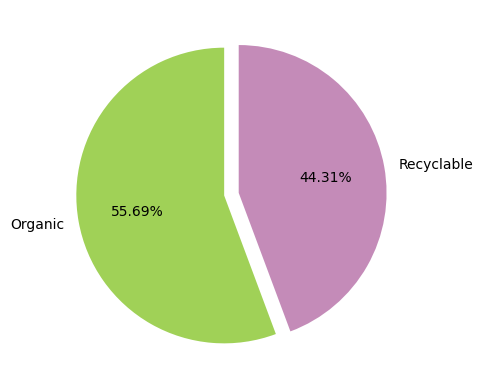

In [38]:
colors = ['#a0d157', '#c48bb8']
plt.pie(data.label.value_counts(), labels=['Organic', 'Recyclable'], autopct='%0.2f%%',
        colors = colors, startangle = 90,  explode=[0.05, 0.05])
plt.show()

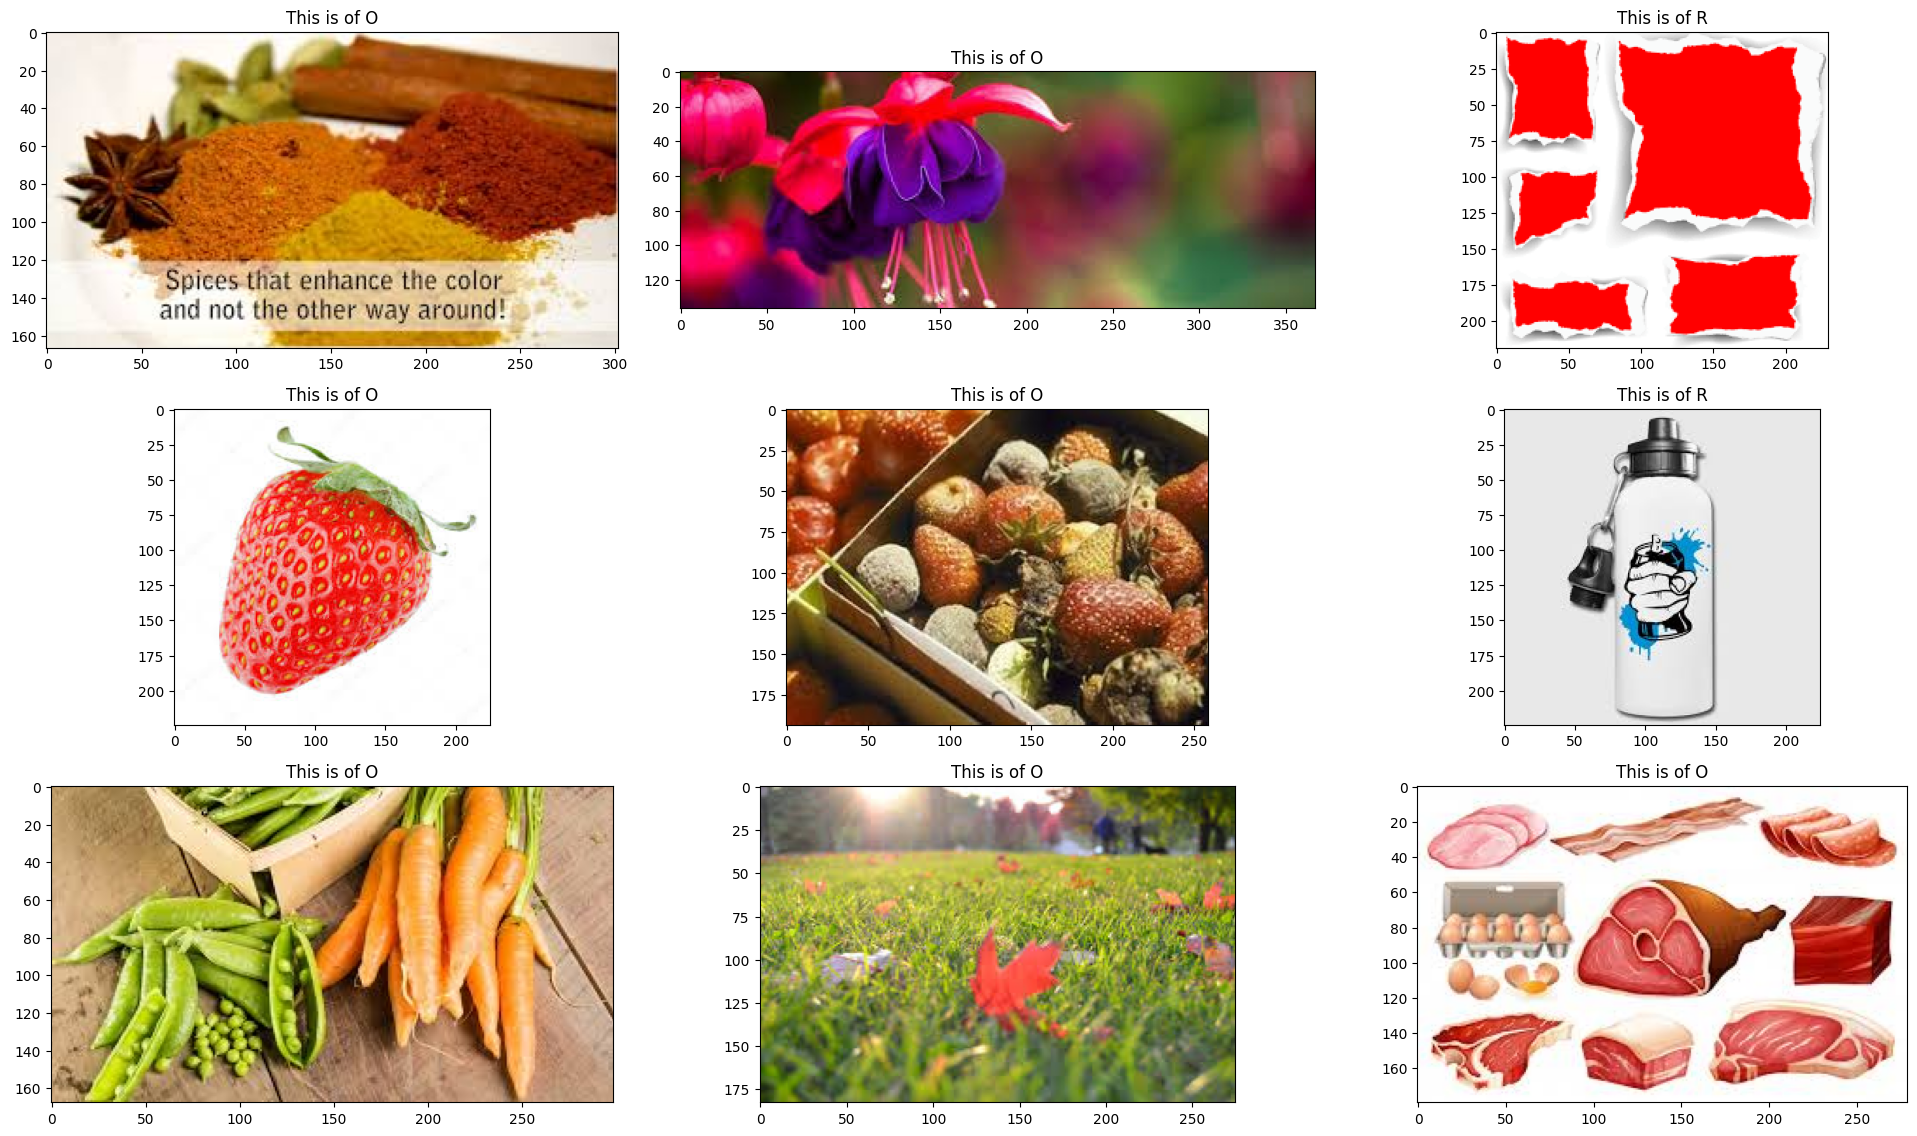

In [39]:
plt.figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(4, 3,(i%12)+1)
    index = np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

### CNN - Convolutional Neural Network

In [40]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])
batch_size = 256

In [41]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 109, 109, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 52, 52, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
train_datagen = ImageDataGenerator(rescale = 1./255)

In [43]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [44]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [47]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint

# Enable eager execution (if needed)
tf.config.run_functions_eagerly(True)

# Define the checkpoint callback to save the best model during training
checkpoint_path = 'best_model.h5'  # File to save the best model
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',        # Monitor validation loss
    save_best_only=True,       # Save only the best model
    save_weights_only=False,   # Save the entire model (architecture + weights)
    mode='min',                # Minimize validation loss
    verbose=1                  # Print a message when saving
)

# Train the model for 15 epochs with the checkpoint callback
hist = model.fit(
    train_generator,
    epochs=15,                 # Train for 15 epochs
    validation_data=test_generator,
    callbacks=[checkpoint_callback]  # Add the checkpoint callback
)

# Save the final model after training completes
model.save('final_trained_model.h5')

Epoch 1/15
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 785ms/step - accuracy: 0.9490 - loss: 0.1436
Epoch 1: val_loss improved from inf to 0.44428, saving model to best_model.h5


89/89 ━━━━━━━━━━━━━━━━━━━━ 87s 923ms/step - accuracy: 0.9490 - loss: 0.1436 - val_accuracy: 0.8898 - val_loss: 0.4443
Epoch 2/15
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 767ms/step - accuracy: 0.9609 - loss: 0.1126
Epoch 2: val_loss did not improve from 0.44428
89/89 ━━━━━━━━━━━━━━━━━━━━ 74s 822ms/step - accuracy: 0.9609 - loss: 0.1126 - val_accuracy: 0.8926 - val_loss: 0.4681
Epoch 3/15
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 780ms/step - accuracy: 0.9671 - loss: 0.0875
Epoch 3: val_loss improved from 0.44428 to 0.42035, saving model to best_model.h5


89/89 ━━━━━━━━━━━━━━━━━━━━ 89s 910ms/step - accuracy: 0.9671 - loss: 0.0876 - val_accuracy: 0.8989 - val_loss: 0.4204
Epoch 4/15
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 788ms/step - accuracy: 0.9767 - loss: 0.0717
Epoch 4: val_loss did not improve from 0.42035
89/89 ━━━━━━━━━━━━━━━━━━━━ 76s 849ms/step - accuracy: 0.9767 - loss: 0.0718 - val_accuracy: 0.8882 - val_loss: 0.5099
Epoch 5/15
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 782ms/step - accuracy: 0.9783 - loss: 0.0643
Epoch 5: val_loss did not improve from 0.42035
89/89 ━━━━━━━━━━━━━━━━━━━━ 80s 898ms/step - accuracy: 0.9783 - loss: 0.0643 - val_accuracy: 0.8874 - val_loss: 0.5428
Epoch 6/15
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 765ms/step - accuracy: 0.9844 - loss: 0.0544
Epoch 6: val_loss did not improve from 0.42035
89/89 ━━━━━━━━━━━━━━━━━━━━ 74s 826ms/step - accuracy: 0.9844 - loss: 0.0544 - val_accuracy: 0.8826 - val_loss: 0.6453
Epoch 7/15
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 772ms/step - accuracy: 0.9835 - loss: 0.0525
Epoch 7: val_loss did not improve from 0.42

KeyboardInterrupt: 

In [48]:
print(hist.history['accuracy'])  # Shows training accuracy for each epoch
print(hist.history['val_accuracy'])  # Shows validation accuracy for each epoch

[0.7751728296279907, 0.8286651372909546, 0.8474560976028442, 0.863277792930603, 0.8674437403678894, 0.8829108476638794, 0.8933256268501282, 0.9071972966194153, 0.9226644039154053, 0.9325474500656128]
[0.8635097742080688, 0.8810186982154846, 0.8909669518470764, 0.8551532030105591, 0.8782331943511963, 0.8778352737426758, 0.8806207776069641, 0.8877835273742676, 0.8842021226882935, 0.9096696972846985]


In [49]:
model = tf.keras.models.load_model('best_model.h5')

In [50]:
loss, accuracy = model.evaluate(test_generator)
print("Accuracy on test data:", accuracy)

10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 545ms/step - accuracy: 0.9008 - loss: 0.4081
Accuracy on test data: 0.8989256024360657


In [51]:
from google.colab import files
files.download('best_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>